## 1. 문제 정의
자전거 대여량 예측하기

## 2. 데이터 읽어오기
### * 캐글에서 받게되는 파일의 구성
- train.csv - 예측 모델을 만들기 위해 사용하는 학습셋
- test.csv - 예측 모델을 이용하여 예측할 탑승객 정보가 담긴 테스트셋
- sampleSubmission.csv - 제출시 사용할 수 있는 csv 파일

In [1]:
import pandas as pd

train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

## 3. 데이터 확인

In [2]:
train.shape

(10886, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
train.tail(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236
10875,2012-12-19 13:00:00,4,0,1,1,17.22,21.210,50,12.9980,30,183,213


In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
test.shape

(6493, 9)

In [8]:
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


### 데이터의 기본 정보 살펴보기 - 시간에 따른 대여량 시각화

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import seaborn as sns

from scipy import stats

In [10]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 17)

In [11]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,2


- 시간(hour)에 따른 대여량 살펴보기

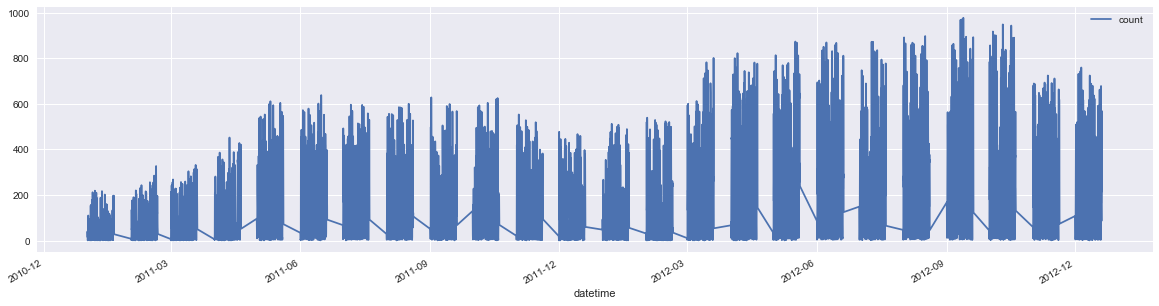

In [12]:
train.plot(x = 'datetime', y = 'count', figsize = (20, 5))
plt.show()

- 시간(month, day)에 따른 대여량 살펴보기

In [16]:
import datetime
def concatenate_year_month_day(datetime):
    return "{0}-{1}-{2}".format(datetime.year, datetime.month, datetime.day)
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['YMD'] = train['datetime'].apply(concatenate_year_month_day)
train['YM'] = train['datetime'].apply(concatenate_year_month)

train_month = pd.pivot_table(train, index = 'YM', values = 'count', aggfunc = np.sum)
train_day = pd.pivot_table(train, index = 'YMD', values = 'count', aggfunc = np.sum)

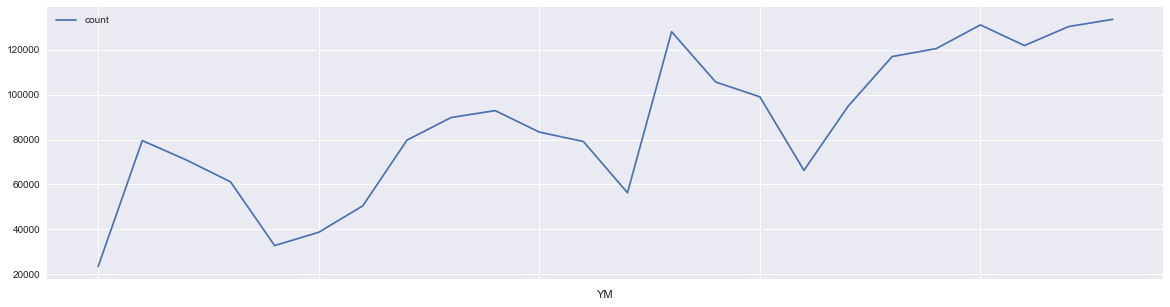

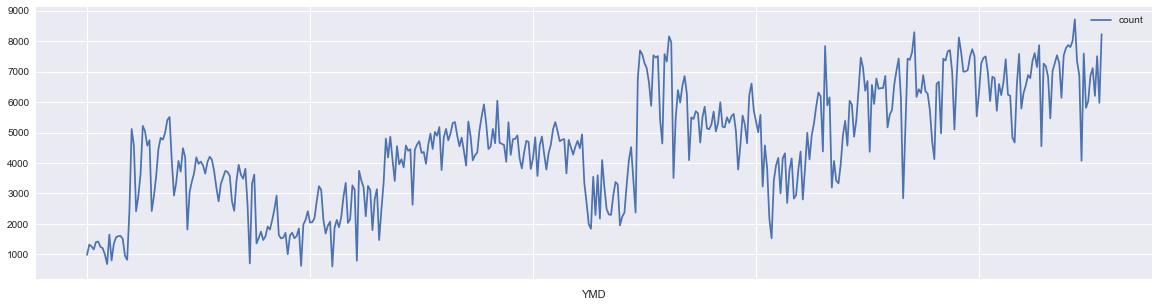

In [17]:
train_month.plot(figsize = (20, 5))
train_day.plot(figsize = (20, 5))

- 계절, 월, 날, 시간대, 공휴일여부, 요일별 대여량 확인

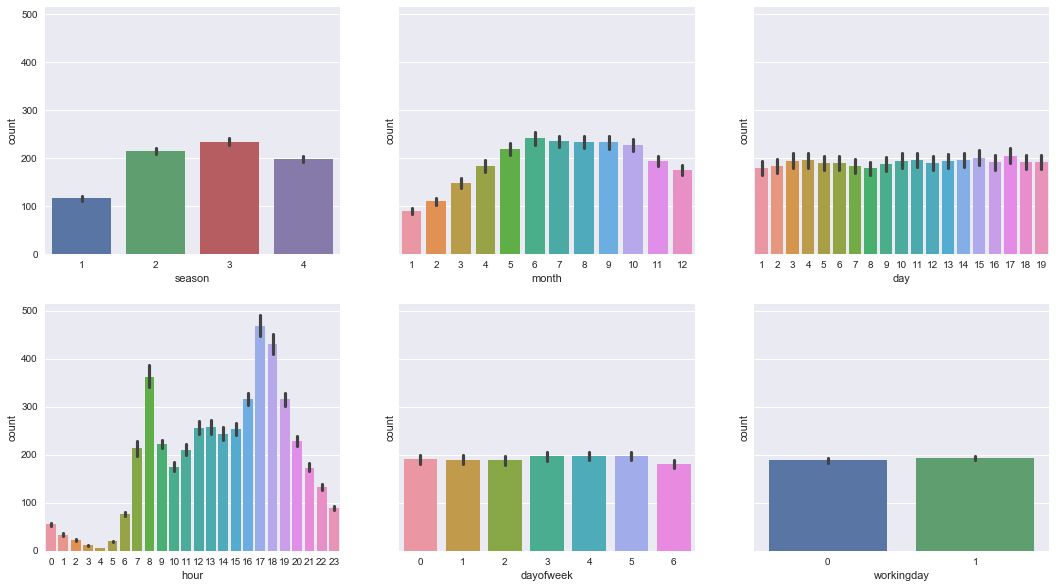

In [18]:
figure, axes = plt.subplots(nrows=2, ncols=3, sharey=True)
figure.set_size_inches(18,10)

sns.barplot(data=train, x="season",     y="count", ax=axes[0][0])
sns.barplot(data=train, x="month",      y="count", ax=axes[0][1])
sns.barplot(data=train, x="day",        y="count", ax=axes[0][2])
sns.barplot(data=train, x="hour",       y="count", ax=axes[1][0])
sns.barplot(data=train, x="dayofweek",  y="count", ax=axes[1][1])
sns.barplot(data=train, x="workingday", y="count", ax=axes[1][2])

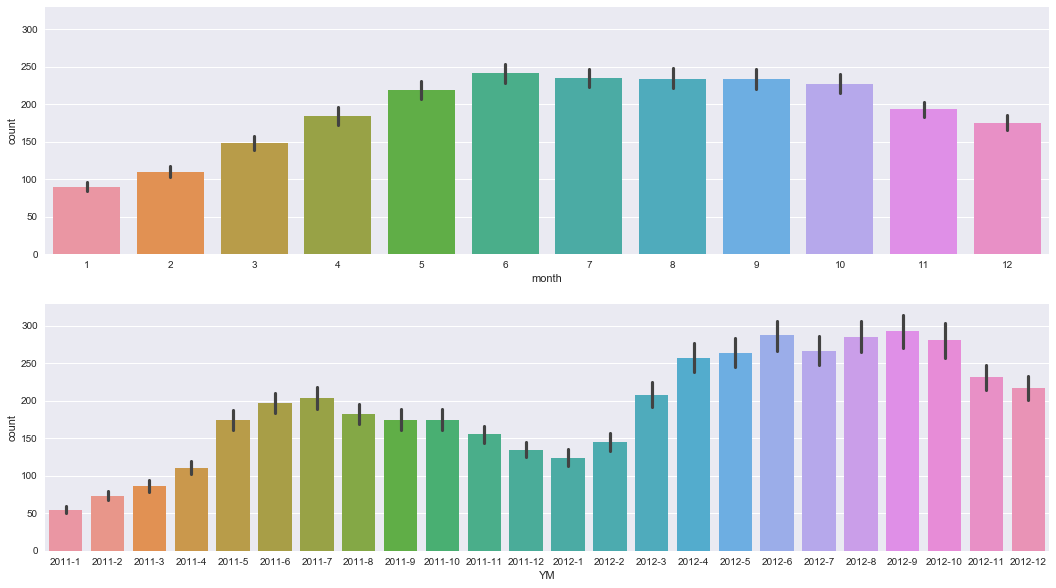

In [73]:
figure, axes = plt.subplots(nrows=2, sharey=True)
figure.set_size_inches(18,10)

sns.barplot(data=train, x="month", y="count", ax=axes[0])
sns.barplot(data=train, x="YM",    y="count", ax=axes[1])

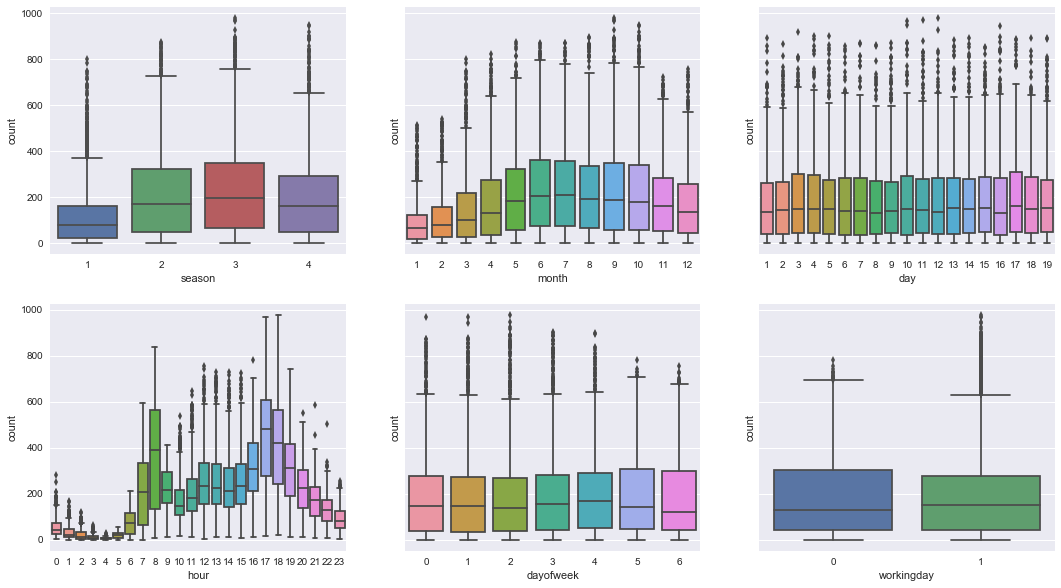

In [19]:
figure, axes = plt.subplots(nrows=2, ncols=3, sharey=True)
figure.set_size_inches(18,10)

sns.boxplot(data=train,y="count",x="season",ax=axes[0][0])
sns.boxplot(data=train, x="month", y="count", ax=axes[0][1])
sns.boxplot(data=train, x="day", y="count", ax=axes[0][2])
sns.boxplot(data=train, x="hour", y="count", ax=axes[1][0])
sns.boxplot(data=train, x="dayofweek", y="count", ax=axes[1][1])
sns.boxplot(data=train,y="count",x="workingday", ax=axes[1][2])

- 하루 중 시간대(0시~23시간)별 대여량 확인

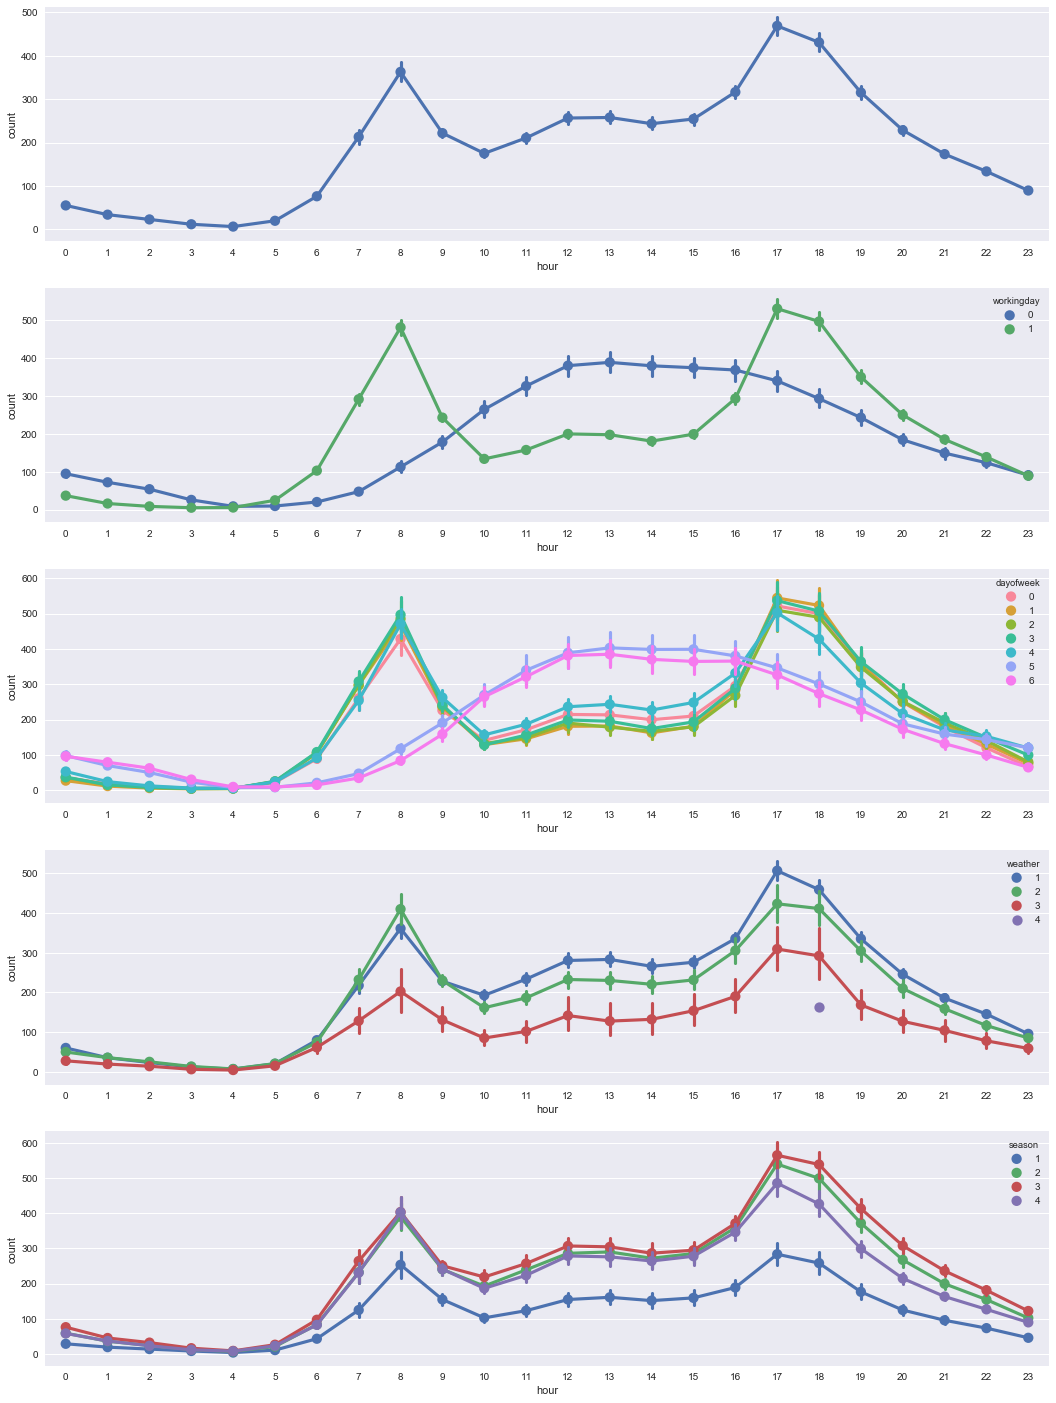

In [20]:
fig, axes= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=axes[0])
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=axes[1])
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=axes[2])
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=axes[3])
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=axes[4])

### 시간 외 다른 수치들 살펴보기

In [21]:
corrMatt = train[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
corrMatt

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


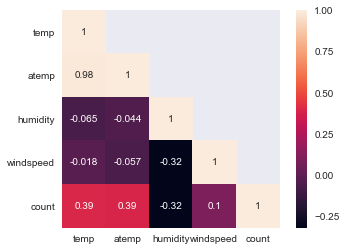

In [22]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,square=True,annot=True)

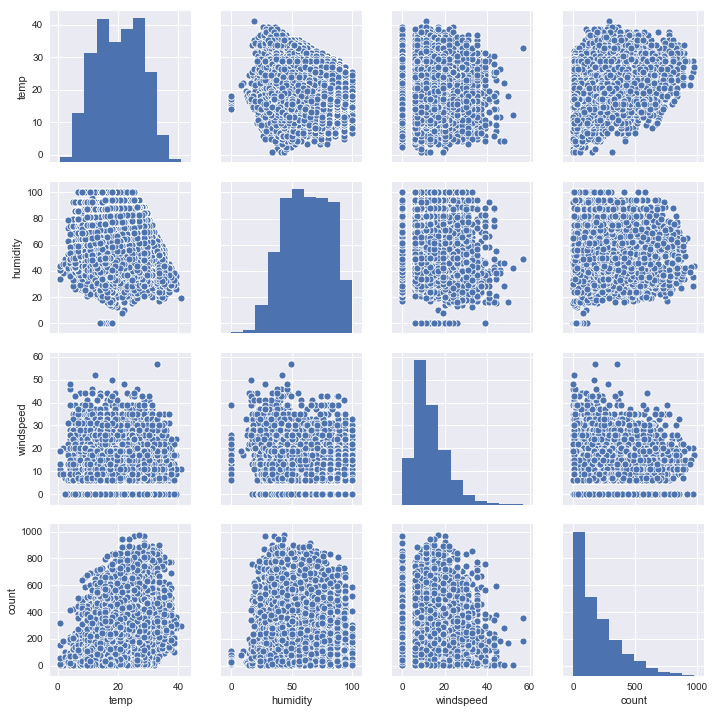

In [23]:
sns.pairplot(train[["temp", "humidity", "windspeed", "count"]])

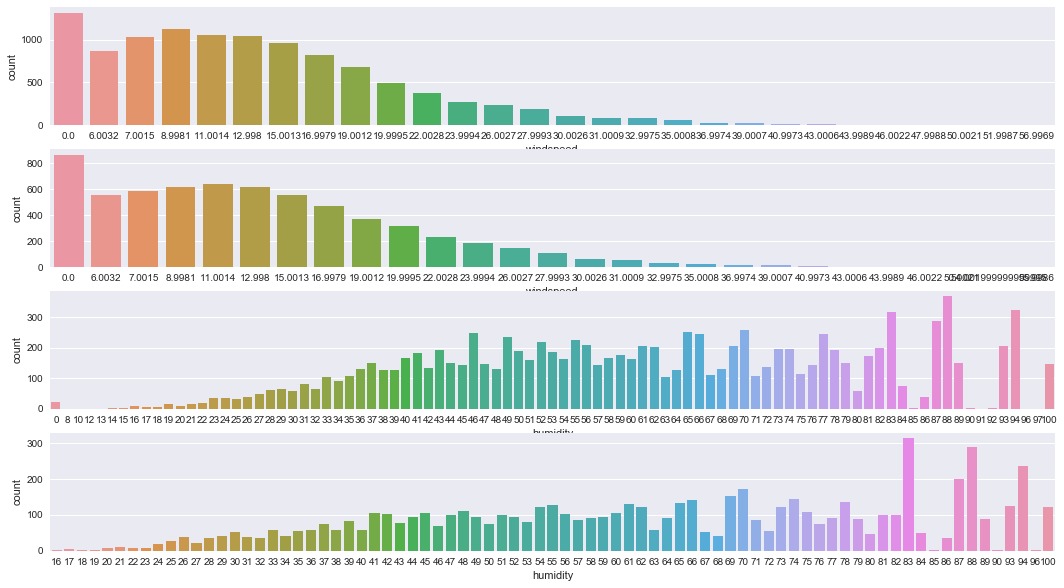

In [45]:
fig, axes= plt.subplots(nrows=4)
fig.set_size_inches(18,10)
sns.countplot(train['windspeed'], ax = axes[0])
sns.countplot(test ['windspeed'], ax = axes[1])
sns.countplot(train['humidity'], ax = axes[2])
sns.countplot(test ['humidity'], ax = axes[3])

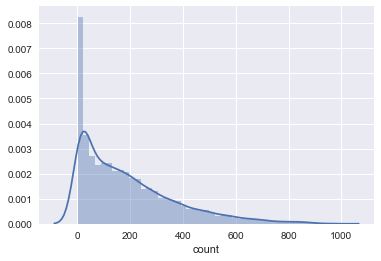

In [25]:
sns.distplot(train['count'])